# <center> Практические задания по цифровой обработке сигналов </center>
# <center> Первая лабораторная работа </center>


В данной работе Вы познакомитесь с основными методами работы с аудиоданными в Python. Разбересь в том, как работает свертка, и примените пару интересных фильтров.

## Теория

Звук - это аналоговый сигнал. То есть он является непрерывным по времени и по значениям. Для того, чтобы работать со звуком на цифровом устройстве, надо преобразовать его в цифровое представление. Для этого надо разделить непрерывный сигнал на промежутки времени (дискретизация сигнала) и разбить непрерывные значения на интервалы (квантование сигнала). Выбраные параметры дискретизации и квантования сигнала напрямую влияют на качество цифрового сигнала. 

<!-- 
## Практика

1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла? 

2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?   

3. Чем .wav отличается от других кодеков, например .mp3 или .ogg? -->


<!-- ### Подсказка

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib. -->

In [104]:
# import libs
import matplotlib.pyplot as plt
import numpy as np
# signal libs

import scipy
import scipy.signal as signal
import IPython.display as ipd
import librosa
import soundfile as sf

import warnings
warnings.filterwarnings('ignore')

### 1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла?

### 2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?

In [105]:
# YOUR ANSWER HERE
import wave

signal_path = './lab_1/signal.wav'
f = wave.open(signal_path, 'rb')
params = f.getparams()
params
# sampwitdth – квантование
# framerate – частота дискретизации

_wave_params(nchannels=2, sampwidth=2, framerate=44100, nframes=574102, comptype='NONE', compname='not compressed')

**Подсказка**

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib.

In [106]:
# YOUR ANSWER HERE
# https://musicinformationretrieval.com/ipython_audio.html
new_signal_path = './lab_1/new_signal.wav'
# Load an audio file as a floating point time series.
# librosa.load(*path, sr, mono=False/True, offset, duration, dtype, res_type)
# resample type (see note)
y, sr = librosa.load(signal_path, sr=44100)
print(y)  # audio time series. Multi-channel is supported. # np.ndarray
print(sr)  # sample rate of y

sf.write(new_signal_path, y, 10000)
ipd.Audio(new_signal_path)

[0.0000000e+00 0.0000000e+00 3.0517578e-05 ... 9.1552734e-05 9.1552734e-05
 9.1552734e-05]
44100


SoundFile can read and write sound files. File reading/writing is supported through libsndfile, which is a free, cross-platform, open-source (LGPL) library for reading and writing many different sampled sound file formats that runs on many platforms including Windows, OS X, and Unix. It is accessed through CFFI, which is a foreign function interface for Python calling C code. CFFI is supported for CPython 2.6+, 3.x and PyPy 2.0+. SoundFile represents audio data as NumPy arrays.

In [107]:
# example of usage
SAMPLE_RATE = 44100
LOW_FACTOR = 0.25
# paths
signal_test_path = r'./lab_1/test/signal_output_44100.wav'
new_lowsignal_test_path = r'./lab_1/test/signal_output_11025.wav'
# Standard_load
y, sr = librosa.load(signal_path, sr=44100, mono=True)
data = librosa.resample(y, sr, SAMPLE_RATE)
sf.write(signal_test_path, data, SAMPLE_RATE)
d, sr = sf.read(signal_test_path)
print('first_signal: ', d, sr)
sf.write(signal_test_path, d, sr)

# Decrease sample rate
y, sr = librosa.load(signal_test_path)
lowData = librosa.resample(y, sr, SAMPLE_RATE * LOW_FACTOR)
sf.write(new_lowsignal_test_path, lowData, SAMPLE_RATE)
d, sr = sf.read(new_lowsignal_test_path)
print('second_signal: ', d, sr)
sf.write(new_lowsignal_test_path, d, sr)

ipd.Audio(signal_test_path)
ipd.Audio(new_lowsignal_test_path)

first_signal:  [0.00000000e+00 0.00000000e+00 3.05175781e-05 ... 9.15527344e-05
 9.15527344e-05 9.15527344e-05] 44100
second_signal:  [0.00000000e+00 3.05175781e-05 6.10351562e-05 ... 6.10351562e-05
 9.15527344e-05 0.00000000e+00] 44100


### 3. Чем .wav отличается от других кодеков, например .mp3 или .ogg?

In [108]:
# YOUR ANSWER HERE

# Задание 2. Гармонические сигналы (1 балл)

## Теория
[Гармонические колебания](https://ru.wikipedia.org/wiki/Гармонические_колебания) -  колебания, при которых физическая величина изменяется с течением времени по гармоническому (синусоидальному/косинусоидальному) закону. 

В общем случае гармонические колебания задаются формулой:

$$y=A \cos(\omega t+\varphi_0)$$

где $А$ - это амплитуда, $\omega$ – циклическая частота (радиан/с), $\varphi$ - фаза (сдвиг), $t$ – время. 


In [109]:
# Сначала определим функцию для отрисовки сигнала с хорошим масштабом и сеткой
# Это поможет легче анализировать сигнал
def draw_signal(data, figsize=(14, 14)):
    plt.figure(figsize=figsize)
    plt.plot(data, linewidth=2)
    plt.minorticks_on()
    plt.xticks(np.arange(0, 1000, step=100))
    plt.yticks(np.arange((min(data).round()) // 10 * 10,
                         (max(data).round()) // 10 * 10 + 10, step=5))
    plt.grid(which='major',
             color='k',
             linewidth=1)
    plt.grid(which='minor',
             color='k',
             linestyle=':')
    plt.show()

In [110]:
# Читаем данные с подготовленными сигналами
import pickle

with open("resources/data.pickle", "rb") as f:
    test_data = pickle.load(f)
# Теперь можно приступать к практике!

## Практика

Постройте графики трех сигналов a, b и c из test_data['task2']. Попробуйте подобрать коэффициенты для этих сигналов. Сгенерируйте сигналы (1000 отсчетов) с подобранными коэффициентами. Постройте графики сгенерированных сигналов и пройдите тест на схожесть с оригинальным.


Подсказка. Фаза, период и амплитуда сигнала - целочисленные. Для генерации пользуйтесь библиотекой numpy и функциями arange, sin, cos.

### Сигнал ***a***

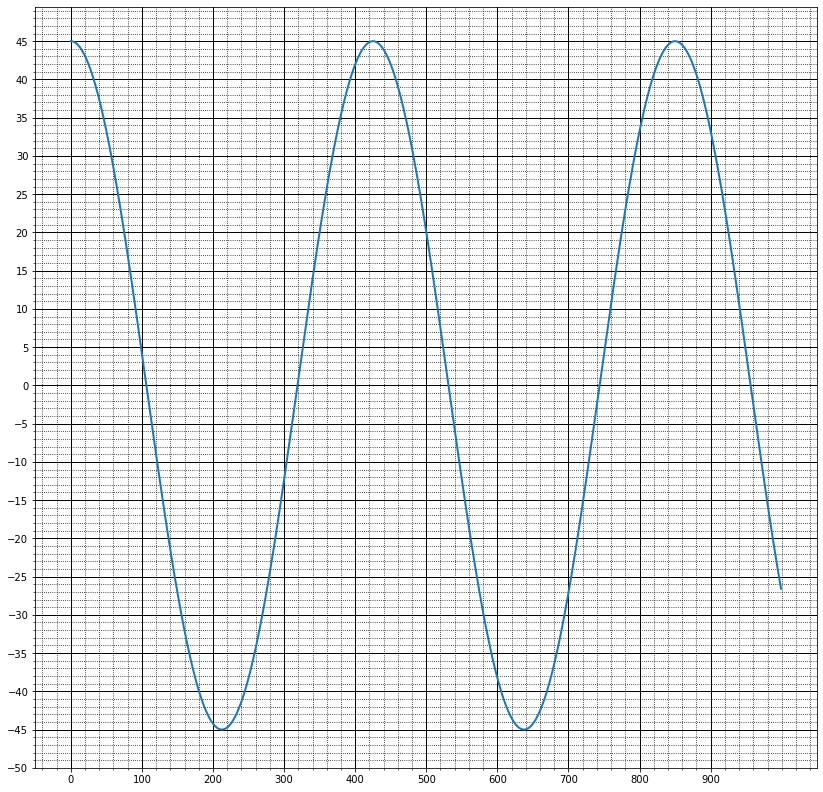

In [111]:
draw_signal(test_data['task2']['a'])

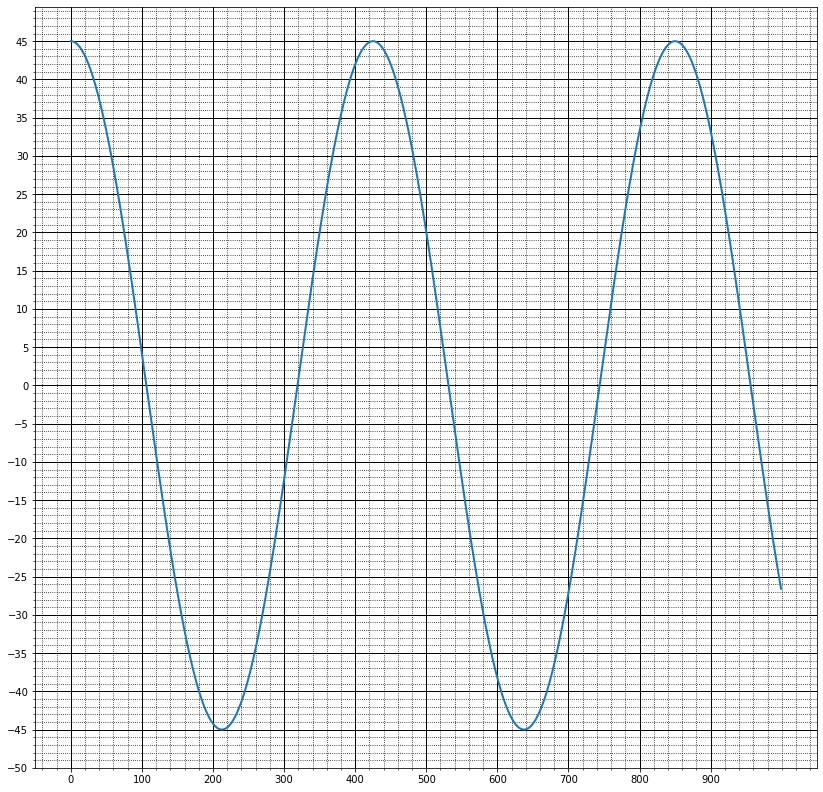

In [112]:
# YOUR CODE HERE
A = 45
w = 425
phi = 0
a = list()
for x in range(0, 1000):
    a = np.append(a, (A * np.cos((2 * np.pi / w) * x + phi)))
draw_signal(a)

![title](lab_1/test/img.png)


**Подобранные коэффициенты для сигнала 'a':**

1. Амплитуда - $A= $

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = $

3. Фаза - $\phi= $

In [113]:
assert len(a) == 1000
assert np.allclose(a, test_data["task2"]["a"], atol=1)
print("Ok!")

Ok!


### Сигнал ***b***

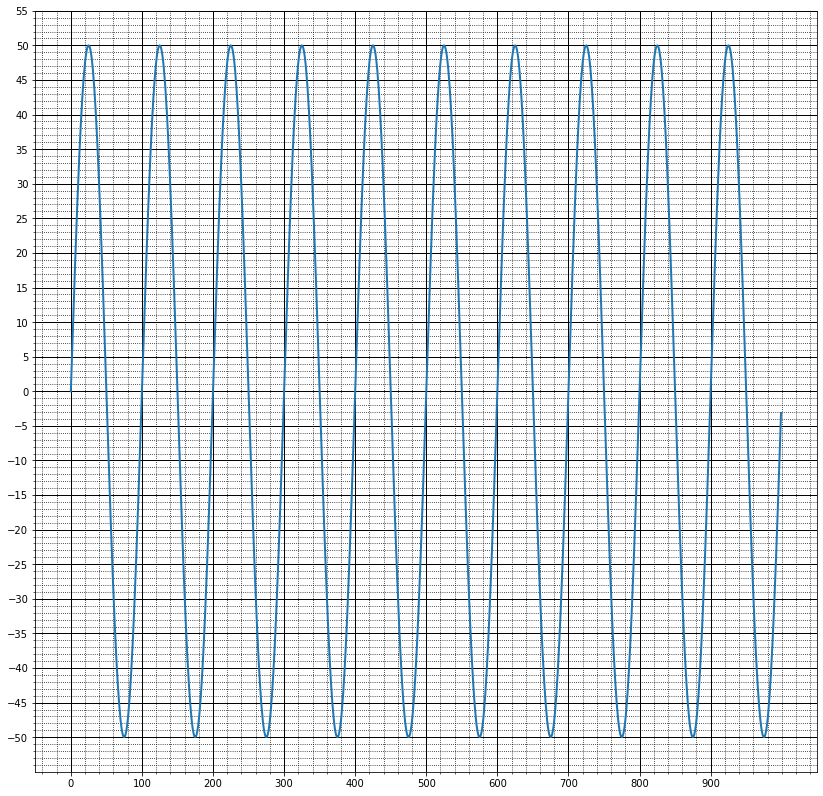

In [114]:
draw_signal(test_data['task2']['b'])

In [115]:
# YOUR CODE HERE
A = 50
w = 100
phi = 1.5 * np.pi
b = np.array([])
for x in range(1000):
    b = np.append(b, (A * np.cos(2 * np.pi / w * x + phi)))

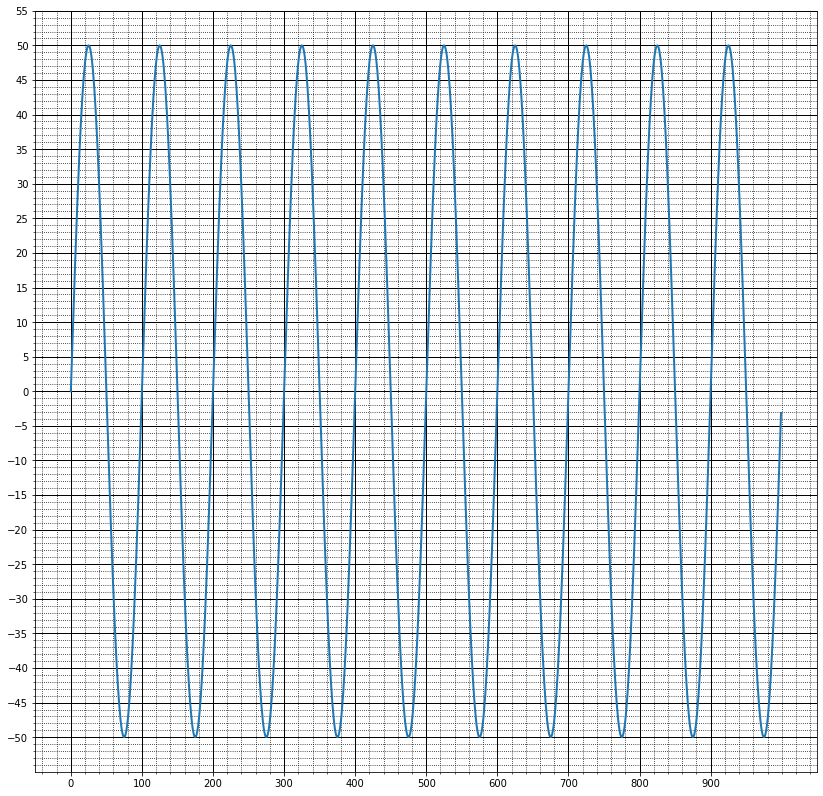

In [116]:
draw_signal(b)

In [117]:
assert len(b) == 1000
assert np.allclose(b, test_data["task2"]["b"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'b':**

1. Амплитуда - $A= $

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = $

3. Фаза - $\phi= $

### Сигнал ***c***

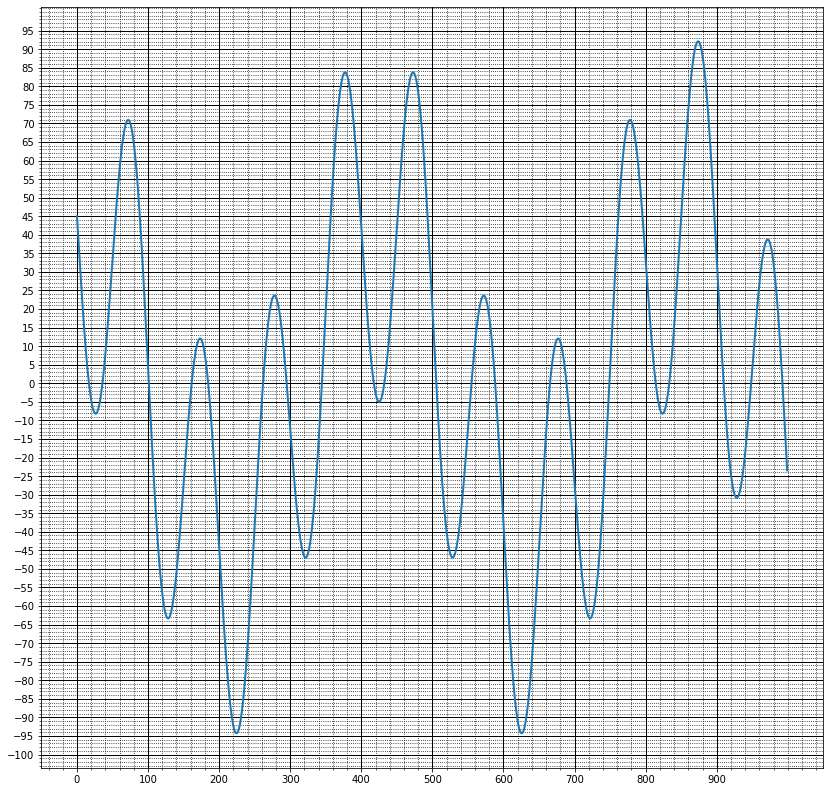

In [118]:
draw_signal(test_data['task2']['c'])

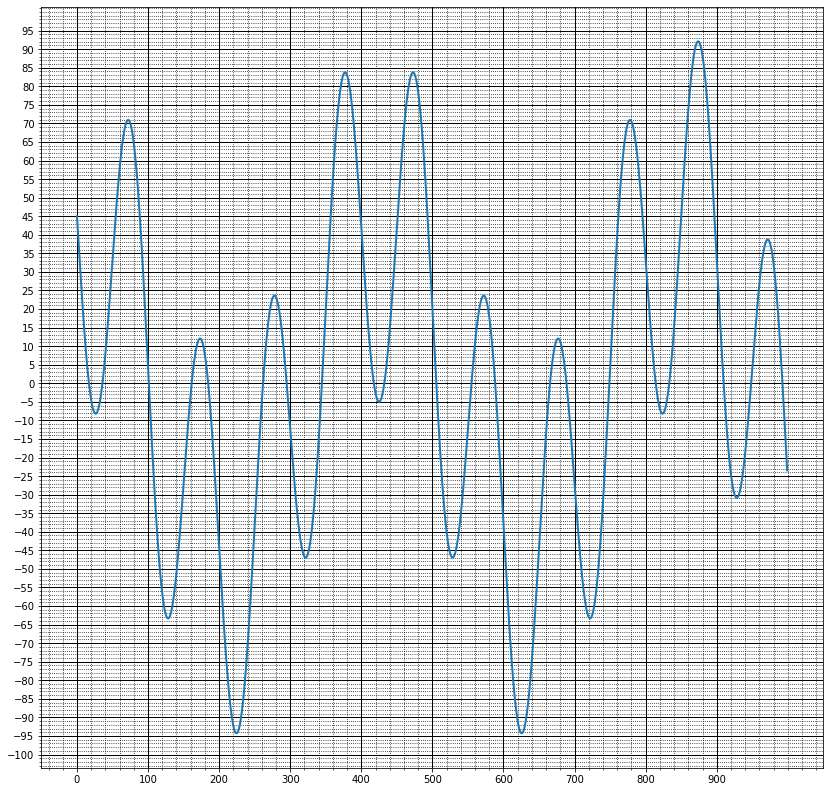

In [119]:
# сигнал состоит из двух гармоник
# YOUR CODE HERE
c = a - b
draw_signal(c)

In [120]:
assert len(c) == 1000
assert np.allclose(c, test_data["task2"]["c"], atol=1)
print("Ok!")

Ok!


# Задание 3. Свертка (3 балла)

## Теория
Одна из наиболее частых операций, которая выполняется при обработке сигналов, это свёртка. Свёртка имеет много различных применений, например, с ее помощью можно убрать из сигнала шумы или применить к сигналу эффект эхо.


Свёртка — это математическая операция, применённая к двум функциям f и g и порождающая третью функцию. Операцию свёртки можно интерпретировать как «схожесть» одной функции с отражённой и сдвинутой копией другой.  Другими словами, преобразование свёртки однозначно определяет выходной сигнал y(t) для установленного значения входного сигнала x(t) при известном значении функции импульсного отклика системы h(t).

<!-- ![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution") -->
Формула свёртки:
$$y_t=\frac{1}{2} \int_0^T x(\tau)h(t-τ)dτ$$
где $\tau$  - длительность импульсной переходной характеристики.

## Практика
Реализуйте операцию свёртки. Сравните её с существующей реализацией scipy.signal.convolve. Постройте графики фильтра, исходного сигнала и результата свертки.

In [121]:
# sof implementation
def convolve(signal, kernel):
    kernel = kernel[::-1]
    return [
        np.dot(
            signal[max(0, i):min(i + len(kernel), len(signal))],
            kernel[max(-i, 0):len(signal) - i * (len(signal) - len(kernel) < i)], )
        for i in range(1 - len(kernel), len(signal))
    ]


# Nurlan's implementation
def convolve(in1, in2):
    res = [0] * (len(in1) + len(in2) - 1)
    for i in range(len(res)):
        if i >= len(in2):
            k = i - len(in2) + 1
        else:
            k = 0
        sum = 0
        while True:
            if 0 <= i - k < len(in2) and 0 <= k < len(in1):
                sum += in1[k] * in2[i - k]
                k += 1
            else:
                res[i] = sum
                break
    return res

In [122]:
def test_convolve(a, b, print_debug=False):
    my_result = convolve(a, b)
    scipy_result = scipy.signal.convolve(a, b, method='direct')
    if print_debug:
        print(f"Your result {my_result}")
        print(f"Scipy result {scipy_result}")
    assert np.allclose(my_result, scipy_result), f"Test {a} conv {b} failed"
    print("Ok!")

In [123]:
a = np.repeat([0, 1, 0], 10)
b = np.array([0, 1, 2, 3, 2, 1, 0])

In [124]:
test_convolve(a, b, print_debug=False)

Ok!


### Нарисуйте результат свертки a и b

Сигнал **а**

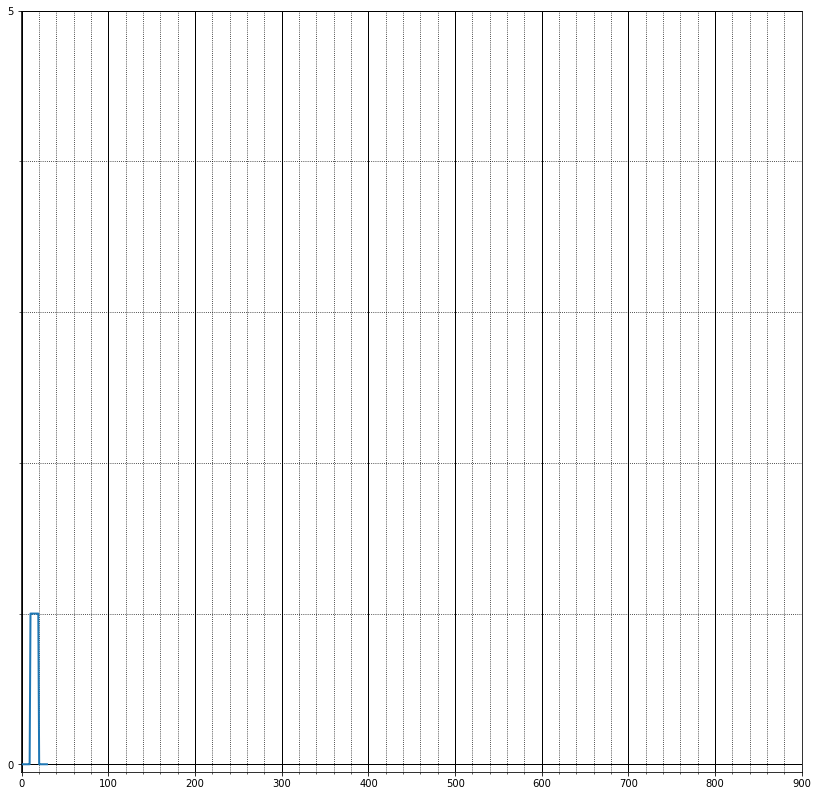

In [125]:
# YOUR CODE HERE
draw_signal(a)

Сигнал **b**

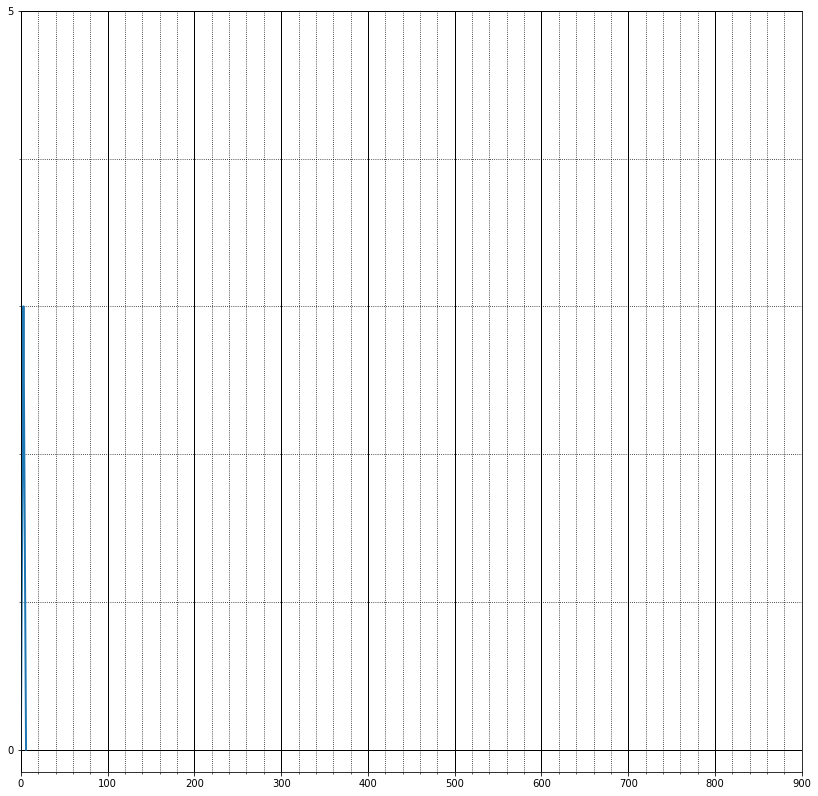

In [126]:
# YOUR CODE HERE
draw_signal(b)

Свертка **a** и **b**

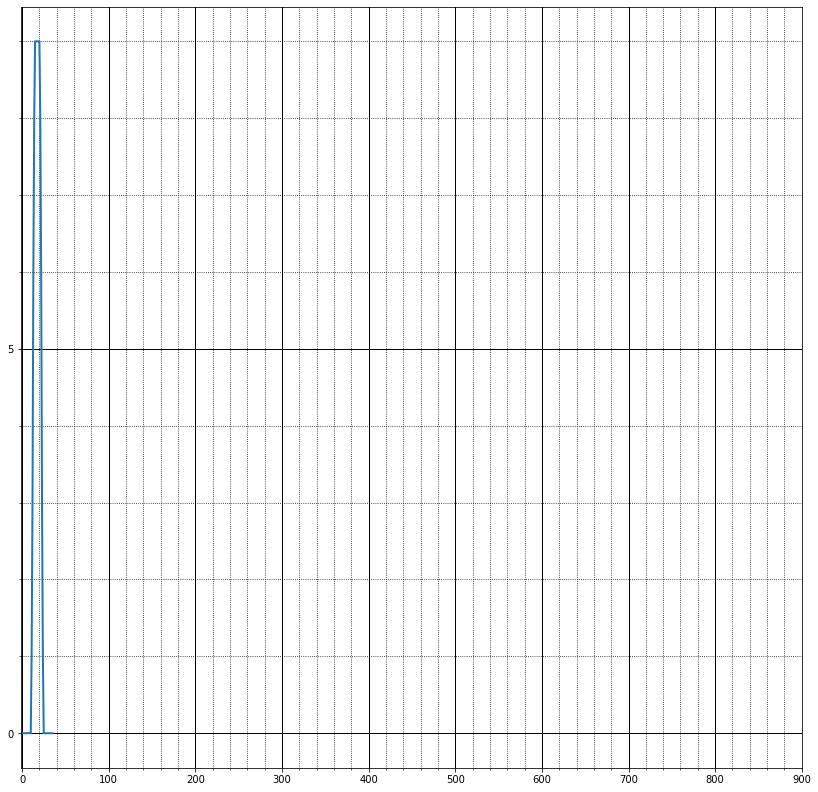

In [127]:
# YOUR CODE HERE
draw_signal(convolve(a, b))

Все 3 графика на одной картинке:

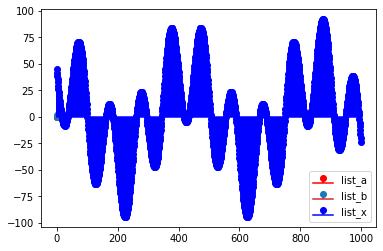

In [128]:
# YOUR CODE HERE

a_horizontal = range(len(a))
b_horizontal = range(len(b))
c_horizontal = range(len(c))

a_gr = plt.stem(a_horizontal, a, label="list_a")
plt.setp(a_gr, color="green")
b_gr = plt.stem(b_horizontal, b, label="list_b")
plt.setp(a_gr, color="red")
x_gr = plt.stem(c_horizontal, c, label="list_x")
plt.setp(x_gr, color="blue")
plt.legend()

# Задание 4. * Алгоритм Карплуса-Стронга 

Реализуйте  [Алгоритм Карплуса-Стронга](https://en.wikipedia.org/wiki/Karplus%E2%80%93Strong_string_synthesis). В качестве фильтра используйте усреднитель двух смежных отсчетов. Проверьте результат. 

Отрисуйте и воспроизведите полученный сигнал. На что влияют параметры генерации? Попробуйте имитировать звучание разных струн гитары.

https://temofeev.ru/info/articles/modelirovanie-zvuka-gitarnykh-not-s-pomoshchyu-algoritma-karplusa-stronga-na-python/

In [129]:
import numpy as np
import scipy.io.wavfile as wave

np.random.seed(seed=1)
sample_rate = 44100
frequency = 82.41
sec = 2
gen_len = sample_rate * sec
noise = (2 * np.random.uniform(-1, 1, int(sample_rate / frequency)))  # [-1, 1]

In [130]:
def karplus_strong(noise, gen_len):
    samples = np.zeros(int(gen_len))
    for i in range(len(noise)):
        samples[i] = noise[i]
    for i in range(len(noise), len(samples)):
        samples[i] = (samples[i - len(noise)] + samples[i - len(noise) - 1]) / 2
    return samples

In [131]:
karplus_strong(noise, gen_len)

array([-0.33191198,  0.88129797, -1.9995425 , ..., -0.14259537,
       -0.14459749, -0.14427879])

### Попробуем покрутить параметры генерации

Сгенерируем гитарные ноты:

In [132]:
# YOUR CODE HERE
# frequency = 440 # A
# frequency = 1046.50 # C
frequency = 82.41 #E2

gen_wav = karplus_strong(noise, gen_len)
f = wave.write('./lab_1/musical_signals/E_2.wav', rate=sample_rate, data=gen_wav)

Визуализируем затухание амплитуды:

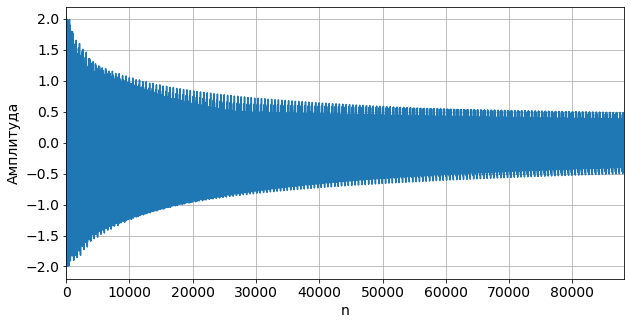

In [133]:
plt.figure(figsize=(10, 5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, gen_len)
plt.plot(np.linspace(0, gen_len + 1, gen_len), gen_wav)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()

Визуализируйте затухание амплитуд гитарных нот:

In [134]:
# YOUR CODE HERE
